In [1]:
import sklearn
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("../datasets/auto-mpg-processed.csv")

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,35.0,4,72.0,69,1613,18.0,49
1,26.0,4,98.0,90,2265,15.5,47
2,23.7,3,70.0,100,2420,12.5,40
3,33.0,4,105.0,74,2190,14.2,39
4,30.5,4,98.0,63,2051,17.0,43


In [4]:
data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
383,27.0,4,151.0,90,2950,17.3,38
131,19.4,6,232.0,90,3210,17.2,42
6,23.2,4,156.0,105,2745,16.7,42
32,22.0,4,122.0,86,2395,16.0,48
18,14.0,8,351.0,153,4129,13.0,48


This time, instead of using a single feature to train our model, we'll use more than one feature. Create our X variables that we'll use to train our model using displacement, horsepower, and weight.

In [5]:
X = data[['horsepower']]
Y = data[['mpg']]

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)

In [7]:
x_train.shape,y_train.shape

((313, 1), (313, 1))

In [8]:
x_test.shape,y_test.shape

((79, 1), (79, 1))

In [9]:
linear_model = LinearRegression(normalize=True).fit(x_train,y_train)

In [10]:
print("Training Score: ",linear_model.score(x_train,y_train)) #returns r-squared

Training Score:  0.5906795437173484


In [11]:
y_pred = linear_model.predict(x_test)

In [12]:
from sklearn.metrics import r2_score
print("Testing Score: ",r2_score(y_test,y_pred))

Testing Score:  0.6566208330112283


The R square on test data is better than on training data, which means that our model is a good, robust model, not overfitted on the training data. An overfitted model is one that does well on the training data, but does poorly when used for prediction or on test data. Let's use a little visualization to see how well our linear model fits on the underlying data.

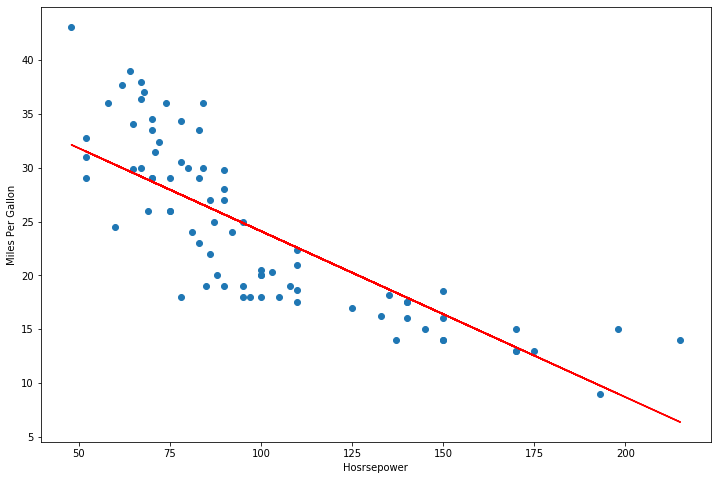

In [13]:
fig , ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='r')

plt.xlabel('Hosrsepower')
plt.ylabel("Miles Per Gallon")

plt.show()

# Build model Using Another Feature

In [24]:
X = data[['age']]
Y = data[['mpg']]

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)

linear_model = LinearRegression(normalize=True).fit(x_train,y_train)

In [25]:
print("Training Score: ",linear_model.score(x_train,y_train)) #returns r-squared

Training Score:  0.3664019282755696


In [26]:
y_pred = linear_model.predict(x_test)

In [27]:
from sklearn.metrics import r2_score
print("Testing Score: ",r2_score(y_test,y_pred))

Testing Score:  0.21257101110878907


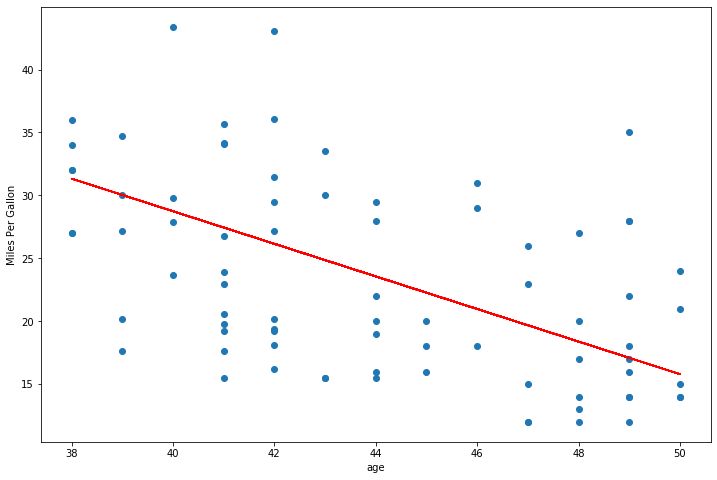

In [28]:
fig , ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='r')

plt.xlabel('age')
plt.ylabel("Miles Per Gallon")

plt.show()

The training R square score is 36%, and the test score is 21%, so this is a pretty poor model. So, age by itself is not really a good predictor for the car's mileage, and this will be drawn out using our visualization as well. 

You can see that the line that we've drawn here really doesn't capture the underlying variation in the data well, which is why this model has a low R square score. The points are too scattered, too far apart, the line really doesn't represent them well.